In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 1. import dataset

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time 
import ast 
import matplotlib
import joblib
import warnings 
warnings.filterwarnings(action = 'ignore')

# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std

# sklearn 관련
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.externals import joblib 

# xgboost 관련
from xgboost import XGBClassifier
from xgboost import plot_importance

# lightgbm 관련
from lightgbm import LGBMClassifier
from lightgbm import plot_importance

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/OBGY_modeling/project1_model_dataset_cate.csv', encoding = "euc-kr")
dataset.head()

,age,twin,bmi,전자간증,PIH임신중고혈압,고혈압,산과력_출산력P,산과력_출산력A,수축억제제,저체중아,태아성장지연,태반조기박리,부인과수술력,자궁봉축술,입원총기간,입원횟수,첫투약시기,outcome
0,중위험,단태아,초기비만,NO,NO,YES,1회,1회,YES,NO,NO,NO,NO,NO,2day,0회,0_period,3
1,저위험,단태아,정상,NO,NO,NO,0회,3이상,NO,NO,NO,NO,NO,NO,4day,1회,0_period,3
2,저위험,단태아,중위험비만,NO,NO,NO,0회,0회,NO,NO,NO,NO,NO,NO,4day,1회,0_period,3
3,저위험,단태아,정상,NO,NO,NO,0회,0회,NO,NO,YES,NO,NO,NO,2day,0회,0_period,3
4,중위험,단태아,정상,NO,NO,NO,0회,0회,YES,NO,NO,NO,NO,NO,2day,0회,0_period,3


In [4]:
# dataset = dataset.astype(str)
# dataset.dtypes

In [6]:
# factor로 변환
dataset["age"] = dataset["age"].astype("category")
dataset["twin"] = dataset["twin"].astype("category")
dataset["PIH임신중고혈압"] = dataset["PIH임신중고혈압"].astype("category")
dataset["bmi"] = dataset["bmi"].astype("category")
dataset["전자간증"] = dataset["전자간증"].astype("category")
dataset["고혈압"] = dataset["고혈압"].astype("category")
dataset["산과력_출산력P"] = dataset["산과력_출산력P"].astype("category")
dataset["산과력_출산력A"] = dataset["산과력_출산력A"].astype("category")
dataset["수축억제제"] = dataset["수축억제제"].astype("category")
dataset["저체중아"] = dataset["저체중아"].astype("category")
dataset["태아성장지연"] = dataset["태아성장지연"].astype("category")
dataset["태반조기박리"] = dataset["태반조기박리"].astype("category")
dataset["부인과수술력"] = dataset["부인과수술력"].astype("category")
dataset["자궁봉축술"] = dataset["자궁봉축술"].astype("category")
dataset["입원총기간"] = dataset["입원총기간"].astype("category")
dataset["입원횟수"] = dataset["입원횟수"].astype("category")
dataset["첫투약시기"] = dataset["첫투약시기"].astype("category")
dataset["outcome"] = dataset["outcome"].astype("category")

In [7]:
# Checking for null values
print(dataset.info())

# Checking for outliers
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16109 entries, 0 to 16108
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        16109 non-null  category
 1   twin       16109 non-null  category
 2   bmi        16109 non-null  category
 3   전자간증       16109 non-null  category
 4   PIH임신중고혈압  16109 non-null  category
 5   고혈압        16109 non-null  category
 6   산과력_출산력P   16109 non-null  category
 7   산과력_출산력A   16109 non-null  category
 8   수축억제제      16109 non-null  category
 9   저체중아       16109 non-null  category
 10  태아성장지연     16109 non-null  category
 11  태반조기박리     16109 non-null  category
 12  부인과수술력     16109 non-null  category
 13  자궁봉축술      16109 non-null  category
 14  입원총기간      16109 non-null  category
 15  입원횟수       16109 non-null  category
 16  첫투약시기      16109 non-null  category
 17  outcome    16109 non-null  category
dtypes: category(18)
memory usage: 286.1 KB
None
          age   twin  

In [8]:
dataset.isna().sum()

age          0
twin         0
bmi          0
전자간증         0
PIH임신중고혈압    0
고혈압          0
산과력_출산력P     0
산과력_출산력A     0
수축억제제        0
저체중아         0
태아성장지연       0
태반조기박리       0
부인과수술력       0
자궁봉축술        0
입원총기간        0
입원횟수         0
첫투약시기        0
outcome      0
dtype: int64

In [9]:
dataset.dtypes

age          category
twin         category
bmi          category
전자간증         category
PIH임신중고혈압    category
고혈압          category
산과력_출산력P     category
산과력_출산력A     category
수축억제제        category
저체중아         category
태아성장지연       category
태반조기박리       category
부인과수술력       category
자궁봉축술        category
입원총기간        category
입원횟수         category
첫투약시기        category
outcome      category
dtype: object

# one-hot-encoding

In [10]:
var = ['twin','전자간증','PIH임신중고혈압','고혈압','산과력_출산력P', '산과력_출산력A','수축억제제','저체중아','태아성장지연',
       '태반조기박리','부인과수술력','자궁봉축술','입원횟수','첫투약시기','age','bmi','입원총기간']

encoder = OneHotEncoder()
onehot = pd.DataFrame(encoder.fit_transform(dataset[var]).toarray(), columns = encoder.get_feature_names())
df = pd.concat([onehot, dataset], axis = 1).drop(columns = var)
df


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_다태아,x0_단태아,x1_NO,x1_YES,x2_NO,x2_YES,x3_NO,x3_YES,x4_0회,x4_1회,...,x15_저체중,x15_정상,x15_중위험비만,x15_초기비만,x16_1day,x16_2day,x16_3day,x16_4day,x16_5day,outcome
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16104,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
16105,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
16106,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
16107,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2


# 2. split train / test set 

In [11]:
np.random.seed(0)
df_train, df_test = train_test_split(df ,train_size =0.75, test_size = 0.25, random_state = 100)


In [12]:
# X_train, y_train 나누기 
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]

X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) #12081, 4028 

(12081, 52) (12081,) (4028, 52) (4028,)


# 3. multinomial logistic regreesion

In [13]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print(classification_report(y_test, y_hat))

Mean Accuracy: 0.776 (0.008)
              precision    recall  f1-score   support

           1       0.62      0.18      0.28       192
           2       0.70      0.37      0.49      1032
           3       0.79      0.97      0.87      2804

    accuracy                           0.78      4028
   macro avg       0.71      0.51      0.55      4028
weighted avg       0.76      0.78      0.74      4028



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# 4. xgboost model 

In [14]:
tic = time.time() #시작 시간
#---------------------
# XGBoost 예측모형
xgb_model = XGBClassifier(n_estimators = 500, 
                          random_state = 156, 
                          objective = "multi:softmax", 
                          num_class = 3, 
                          enable_categorical=True)

y_pred = xgb_model.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

#---------------------
toc = time.time() # 끝 시간
print('time elapsed:', toc - tic) 


              precision    recall  f1-score   support

           1       0.63      0.26      0.37       192
           2       0.71      0.37      0.49      1032
           3       0.79      0.97      0.87      2804

    accuracy                           0.78      4028
   macro avg       0.71      0.53      0.58      4028
weighted avg       0.77      0.78      0.75      4028

time elapsed: 31.66077947616577


In [ ]:
# tic = time.time()
# #-------------------
# # Grid Search
# xgb = XGBClassifier(n_estimators = 100, 
#                     random_state = 156,
#                     objective = "multi:softmax", 
#                     num_class = 3, 
#                     enable_categorical=True)

# # 하이퍼파라미터 후보
# params = {'max_depth':[3,10], 
#           'min_child_weight':[1,3],
#           'colsample_bytree':[0.25, 0.5, 0.75]}

# # folds = 3
# gridcv = GridSearchCV(xgb, param_grid = params, cv = 3)
# gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = "merror",
#           eval_set = [(X_train, y_train), (X_test, y_test)])

# y_pred_1 = gridcv.predict(X_test)
# #-------------------
# toc = time.time() 
# print(classification_report(y_test, y_pred_1))
# print('Optimized hyperparameters', gridcv.best_params_) 
# print('time elapsed:', toc - tic) 

In [15]:
# hiperparameter
tic = time.time()

xgb_final = XGBClassifier(colsample_bytree = 0.25, 
                    max_depth = 10, 
                    min_child_weight = 1,
                    n_estimators = 1000, 
                    random_state = 156,
                    learning_rate = 0.02, 
                    reg_alpha = 0.03,
                    objective = "multi:softmax", 
                    num_class = 3, 
                    enable_categorical=True)

y_pred_2 = xgb_final.fit(X_train, y_train).predict(X_test)

#---------------------
toc = time.time() # 끝 시간
print('time elapsed:', toc - tic) 
print(classification_report(y_test, y_pred_2))
  
joblib.dump(xgb_final, 'trained_model_full') 

time elapsed: 71.13173079490662
              precision    recall  f1-score   support

           1       0.56      0.25      0.35       192
           2       0.69      0.37      0.48      1032
           3       0.79      0.96      0.87      2804

    accuracy                           0.78      4028
   macro avg       0.68      0.53      0.56      4028
weighted avg       0.76      0.78      0.74      4028



['trained_model_full']

In [16]:
xgb_final.feature_importances_

array([0.1608041 , 0.184408  , 0.01731748, 0.01525441, 0.00409993,
       0.00405643, 0.00311362, 0.00338187, 0.00732902, 0.00595319,
       0.00620873, 0.00768139, 0.00419365, 0.00406554, 0.00425857,
       0.00424272, 0.00913823, 0.01126045, 0.        , 0.01009096,
       0.01045519, 0.00980948, 0.00947761, 0.00362029, 0.00343073,
       0.00428186, 0.00423925, 0.01325674, 0.00885396, 0.00517813,
       0.00303946, 0.00170403, 0.00159503, 0.        , 0.15111196,
       0.10430781, 0.07290237, 0.0306134 , 0.        , 0.00445733,
       0.00436281, 0.00437683, 0.00599502, 0.00516524, 0.00470394,
       0.00681656, 0.00474378, 0.01416738, 0.00849099, 0.0046915 ,
       0.00880255, 0.01849046], dtype=float32)

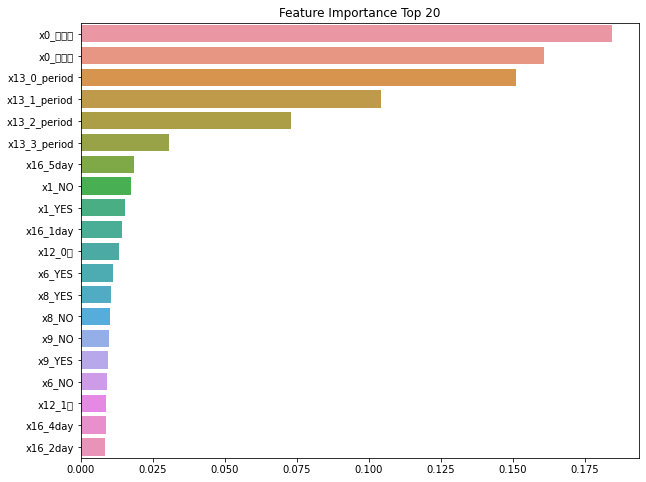

In [28]:
import seaborn as sns
plt.rc('font', family = 'NanumBarunGothic')

# 배열형태로 반환
ft_importance_values = xgb_final.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(10,8))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

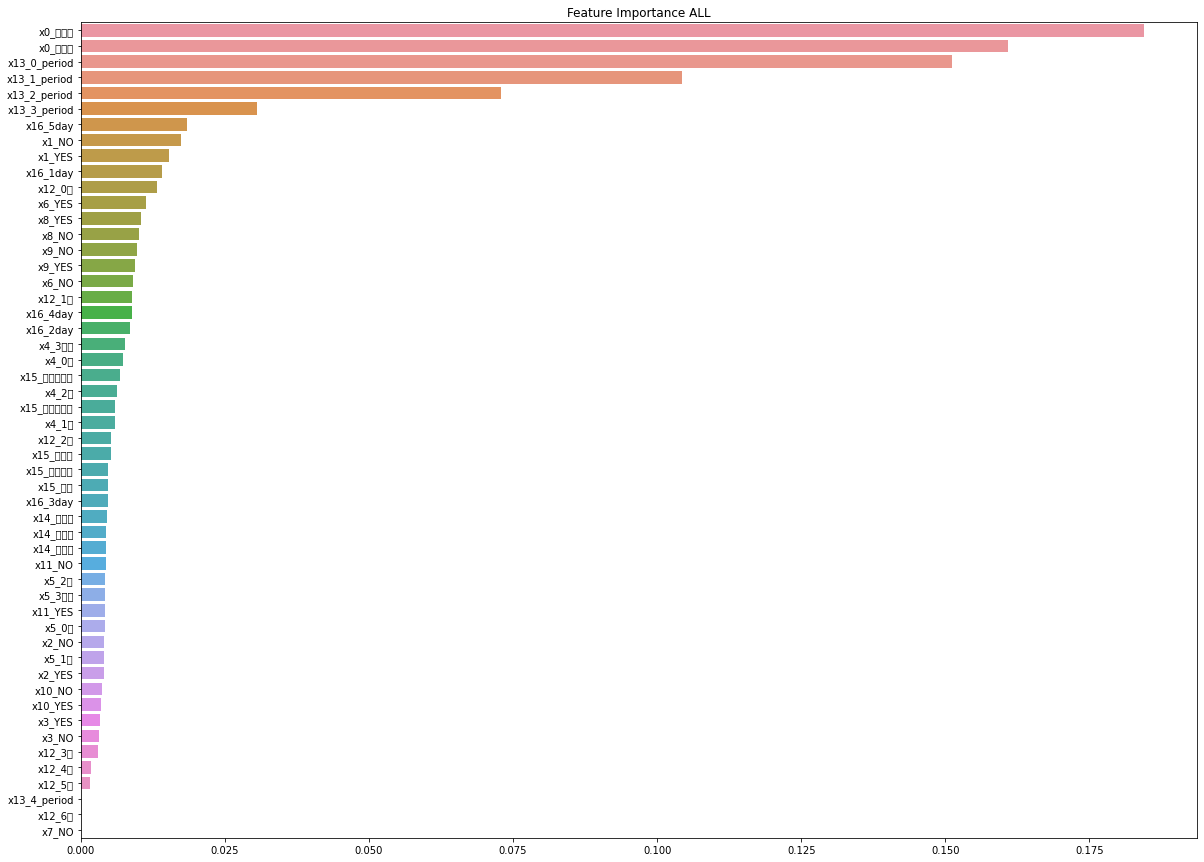

In [23]:
plt.rc('font', family = 'NanumBarunGothic')

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_all= ft_series.sort_values(ascending=False)

# 시각화
plt.figure(figsize=(20,15))
plt.title('Feature Importance ALL')
sns.barplot(x=ft_all, y=ft_all.index)
plt.show()